In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
# Path to SAM checkpoint (update this to where you saved the .pth file)
sam_checkpoint = "sam_vit_h_4b8939.pth"

# Choose a SAM model type: "vit_h", "vit_l", or "vit_b"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Create an automatic mask generator
mask_generator = SamAutomaticMaskGenerator(sam)


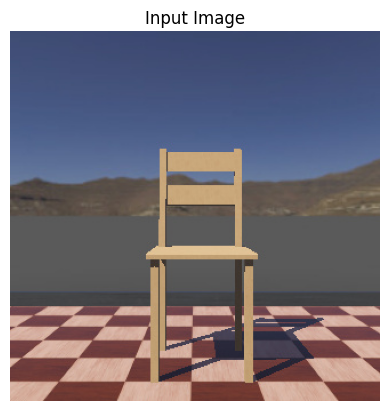

In [10]:
# Path to your input image
image_path = "/home/hpc/v123be/v123be16/sam-3d-objects/notebook/chair_webots/image.jpg"  # change to your image file

# Read with OpenCV (BGR) and convert to RGB for SAM/matplotlib
image_bgr = cv2.imread(image_path)
assert image_bgr is not None, f"Could not read image at {image_path}"

image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()


In [11]:
masks = mask_generator.generate(image)
print(f"Number of masks found: {len(masks)}")

# Inspect the keys of one mask
masks[0].keys()


Number of masks found: 76


dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

Number of masks: 76
Image shape: (324, 324, 3)
First mask shape: (324, 324)


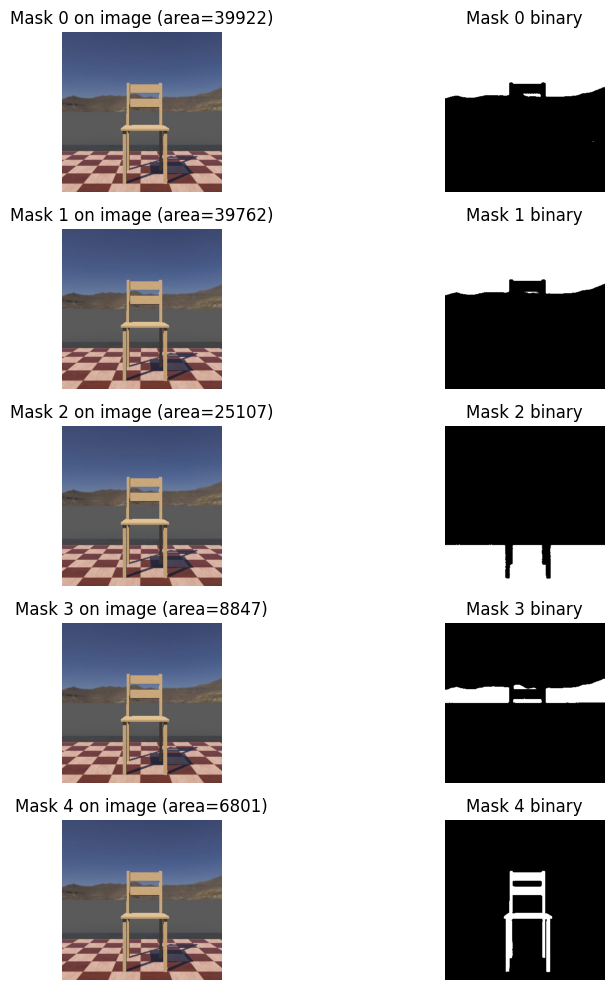

In [12]:
print("Number of masks:", len(masks))
print("Image shape:", image.shape)
print("First mask shape:", masks[0]["segmentation"].shape)

# Show the 5 largest masks by area, one by one
sorted_masks = sorted(masks, key=lambda x: x["area"], reverse=True)
top_k = min(5, len(sorted_masks))

plt.figure(figsize=(10, 2 * top_k))
for i in range(top_k):
    m = sorted_masks[i]["segmentation"]
    plt.subplot(top_k, 2, 2*i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Mask {i} on image (area={sorted_masks[i]['area']})")

    plt.subplot(top_k, 2, 2*i + 2)
    plt.imshow(m, cmap="gray")
    plt.axis("off")
    plt.title(f"Mask {i} binary")
plt.tight_layout()
plt.show()
